In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
df=pd.read_csv('water_potability.csv')
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [2]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

There are missing datas in the dataset.
* 491 in ph column
* 781 in sulfate column
* 162 in Trihalomethanes column

In [5]:
df.isna().sum()/len(df)*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

* 14.987790% data missing in ph column
* 23.840049% data missing in sulfate column
* 4.945055% data missing in Trihalomethanes column

<AxesSubplot:>

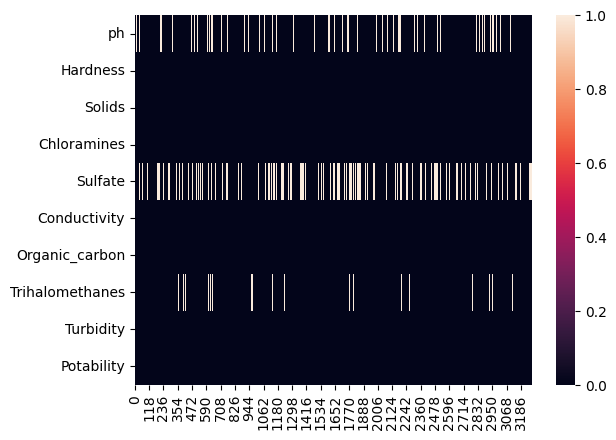

In [6]:
sns.heatmap(df.isna().transpose())

In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Data cleaning and preprocessing

Replacing missing values with their respective medians.

In [8]:
def fill_Sulfate(x):
    if pd.isna(x):
        return 333.073546
    return x
df.Sulfate=df['Sulfate'].apply(fill_Sulfate)

In [9]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Replacing the missing values in PH with the median value of the dataset.

In [10]:
def fill_ph(x):
    if pd.isna(x):
        return 7.036752
    return x

In [11]:
df.ph=df['ph'].apply(fill_ph)

In [12]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [13]:
df.isna().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Trihalomethanes column has the least number of values absent so removing the rows with the missing values

In [14]:
def fill_Trihalomethanes(x):
    if pd.isna(x):
        return 66.622485
    return x
df.Trihalomethanes=df['Trihalomethanes'].apply(fill_Trihalomethanes)

In [15]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [16]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,333.073546,327.459760,16.140368,78.698446,2.309149,1


# data visualization

<AxesSubplot:xlabel='Potability', ylabel='count'>

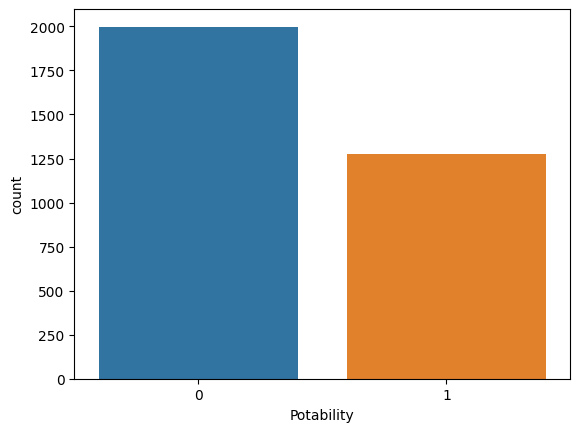

In [17]:
sns.countplot(x='Potability',data = df)

we can see that there is more drinkable water than undrinkable water

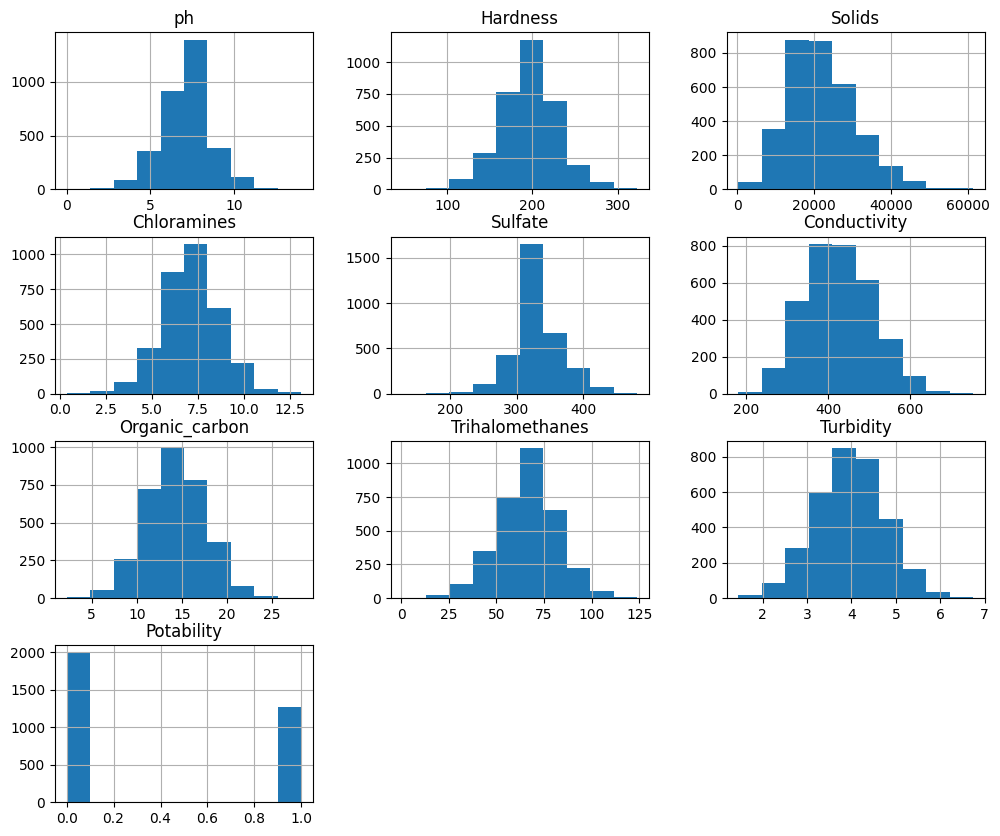

In [18]:
df.hist(bins = 10, figsize = (12,10))
plt.show()

we can see that all the data is normally distributed and have some outliers

# feature selection

<AxesSubplot:>

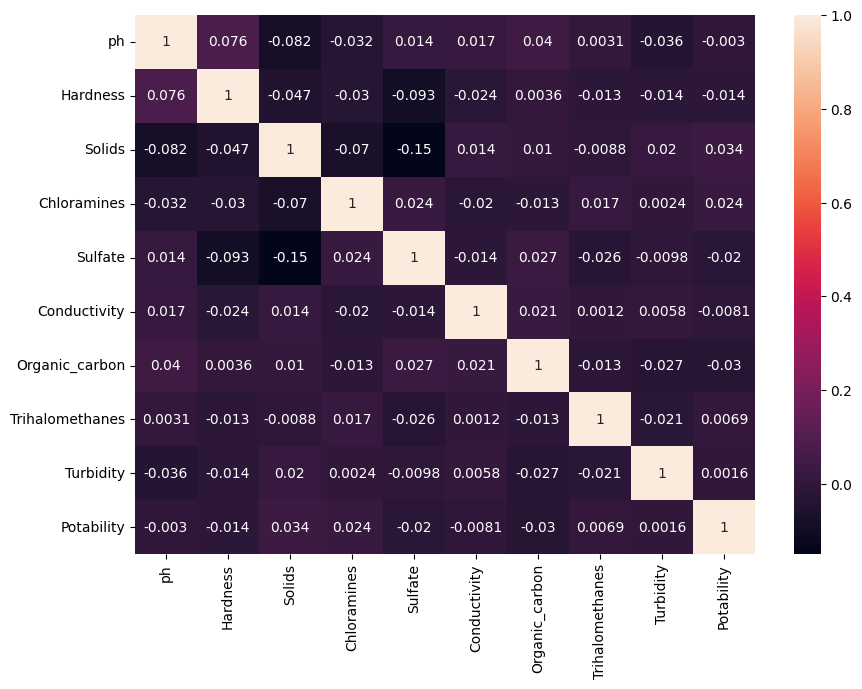

In [19]:
plt.figure(figsize = (10,7))
correlation = df.corr()
sns.heatmap(correlation,annot = True)

based on the correlation values, it appears that ph, conductivity and trihalomethanes have relatively weak correlations with the column potability. These features have absolute correlations less than 0.01, hence we can drop them

In [20]:
df = df.drop(columns = ['ph','Conductivity','Trihalomethanes'],axis='columns')

In [21]:
df.head()

,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Turbidity,Potability
0,204.890455,20791.318981,7.300212,368.516441,10.379783,2.963135,0
1,129.422921,18630.057858,6.635246,333.073546,15.180013,4.500656,0
2,224.236259,19909.541732,9.275884,333.073546,16.868637,3.055934,0
3,214.373394,22018.417441,8.059332,356.886136,18.436524,4.628771,0
4,181.101509,17978.986339,6.546600,310.135738,11.558279,4.075075,0


# handling outliers

In [22]:
# treating the outliers using quantile transformer
from sklearn.preprocessing import QuantileTransformer
x=df
quantile = QuantileTransformer()
X = quantile.fit_transform(x)
df_new= quantile.transform(X)
df_new= pd.DataFrame(X)
df_new.columns =['Hardness','Solids','Chloramines','Sulfate','Organic_carbon','Turbidity','Potability']
df_new.head()

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Turbidity,Potability
0,0.609759,0.494209,0.546648,0.851859,0.112857,0.104108,0.0
1,0.026266,0.391442,0.375097,0.500000,0.610900,0.750398,0.0
2,0.817201,0.447708,0.914984,0.500000,0.778162,0.123562,0.0
3,0.724703,0.547774,0.736183,0.793812,0.895072,0.802284,0.0
4,0.297343,0.358650,0.351374,0.202581,0.202275,0.553574,0.0


# Identifying dependent and independent features

In [23]:
X=df_new.iloc[:,:-1] # independent
y=df_new.Potability   # dependent

In [24]:
X.head()

,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Turbidity
0,0.609759,0.494209,0.546648,0.851859,0.112857,0.104108
1,0.026266,0.391442,0.375097,0.500000,0.610900,0.750398
2,0.817201,0.447708,0.914984,0.500000,0.778162,0.123562
3,0.724703,0.547774,0.736183,0.793812,0.895072,0.802284
4,0.297343,0.358650,0.351374,0.202581,0.202275,0.553574


In [25]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Potability, dtype: float64

# Classification algorithns to know the potability of water

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)

## logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

## SVC

In [48]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state=0 ,probability=True)
svc.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

## GaussianNB

In [49]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

# Decision tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [52]:
y_pred_logreg = logreg.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_dectree = dectree.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
model_scores = {'LR': accuracy_score(y_test, y_pred_logreg)*100,
'SVM': accuracy_score(y_test, y_pred_svc)*100,
'NB': accuracy_score(y_test, y_pred_nb)*100,
'DT': accuracy_score(y_test, y_pred_dectree)*100}

In [56]:
from sklearn.metrics import classification_report
print('Logistic reg:', classification_report(y_test, y_pred_logreg),'\n'
      'SVM:', classification_report(y_test, y_pred_svc),'\n'
      'GaussianNB:', classification_report(y_test, y_pred_nb),'\n',
      'DecisionTree:', classification_report(y_test, y_pred_dectree))

Logistic reg:               precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       412
         1.0       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656
 
SVM:               precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       412
         1.0       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656
 
GaussianNB:               precision    recall  f1-score   support

         0.0       0.64      1.00      0.78       412
         1.0       0.87      0.05      0.10       244

    accuracy                           0.64       656
   macro avg       0.75      0.52      0.44       656
weighted avg       0.72      0.64      0.

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier